In [1]:
import torch

D_1000 = torch.load('1000.pt')
D_1001 = torch.load('1001.pt')

In [15]:
def show(D):
    x_imu = D['x_imu']
    x_s_and_c = D['x_s_and_c']
    y = D['y']

    # print(x_imu[0])
    # print(x_imu.shape)
    
    print(x_s_and_c[0])
    print(x_s_and_c.shape)
    
    print(y[0])
    print(y.shape)


In [16]:
show(D_1000)

tensor([[-0.0719, -0.1751,  0.9961,  ..., -0.0346,  0.0940, -0.0812],
        [-0.0712, -0.1736,  0.9962,  ..., -0.0386,  0.0999, -0.0827],
        [-0.0705, -0.1725,  0.9963,  ..., -0.0373,  0.1009, -0.0851],
        ...,
        [-0.0613, -0.1145,  0.9978,  ..., -0.0396,  0.1097, -0.0878],
        [-0.0603, -0.1147,  0.9978,  ..., -0.0411,  0.1005, -0.0842],
        [-0.0598, -0.1130,  0.9979,  ..., -0.0438,  0.1052, -0.0824]])
torch.Size([1, 40, 131])
tensor([[-0.0215, -0.0806,  0.3161,  ..., -0.0570,  0.0967, -0.1535],
        [-0.0656, -0.1479,  0.9887,  ..., -0.1361,  0.4073, -0.3580],
        [-0.0582, -0.1534,  0.9879,  ..., -0.1488,  0.5519, -0.4090],
        ...,
        [-0.0172, -0.0843,  0.9965,  ..., -0.1937,  0.5531, -0.4292],
        [-0.0126, -0.0840,  0.9963,  ..., -0.2384,  0.5444, -0.4418],
        [-0.0278, -0.0849,  0.9974,  ..., -0.2218,  0.5056, -0.4370]],
       grad_fn=<SelectBackward0>)
torch.Size([1, 40, 131])


In [17]:
show(D_1001)

tensor([[-0.0712, -0.1736,  0.9962,  ..., -0.0386,  0.0999, -0.0827],
        [-0.0705, -0.1725,  0.9963,  ..., -0.0373,  0.1009, -0.0851],
        [-0.0700, -0.1709,  0.9963,  ..., -0.0358,  0.0912, -0.0875],
        ...,
        [-0.0603, -0.1147,  0.9978,  ..., -0.0411,  0.1005, -0.0842],
        [-0.0598, -0.1130,  0.9979,  ..., -0.0438,  0.1052, -0.0824],
        [-0.0599, -0.1099,  0.9979,  ..., -0.0440,  0.1035, -0.0844]])
torch.Size([1, 40, 131])
tensor([[-0.0537, -0.0677,  0.3415,  ..., -0.1531,  0.4993, -0.1856],
        [-0.0614, -0.1301,  1.0268,  ..., -0.2247,  0.5288, -0.4689],
        [-0.0586, -0.1411,  1.0059,  ..., -0.1366,  0.5673, -0.4905],
        ...,
        [-0.0094, -0.0889,  0.9996,  ..., -0.1681,  0.5982, -0.3985],
        [-0.0049, -0.0855,  0.9970,  ..., -0.1595,  0.5299, -0.3822],
        [-0.0157, -0.0906,  0.9962,  ..., -0.1465,  0.5137, -0.3825]],
       grad_fn=<SelectBackward0>)
torch.Size([1, 40, 131])


In [22]:
import json
dataset = open('OpenOrca-Viet.jsonl', encoding='utf-8')
count  = 0
for line in dataset:
    count += 1
    data = json.loads(line)
    print(data)
    break
# print(count)

{'instruction': 'Bạn là một trợ lý hữu ích, người luôn cung cấp lời giải thích. Hãy suy nghĩ như bạn đang trả lời một đứa trẻ năm tuổi.', 'input': 'Tạo một bản tóm tắt ngắn câu này:\n một nhóm người bị lừa đảo trong một kế hoạch ponzi, trong đó các khoản đầu tư của họ được sử dụng để trả tiền lãi hư cấu cho các nhà đầu tư trước đó, đã thua kiện tại tòa án tối cao để chuyển sang đứng đầu trong thủ tục phá sản chống lại một công ty chứng khoán không còn tồn tại.', 'output': 'Rất nhiều người đã bị lừa trong một trò chơi kiếm tiền gọi là kế hoạch Ponzi. Họ muốn là người đầu tiên lấy lại tiền từ một công ty bị phá sản. Nhưng thẩm phán lớn ở tòa án tối cao đã nói không.'}


# Mining

In [40]:
import numpy as np
from scipy.spatial.transform import Rotation


def Rot2Euler(rotation_matrix):
    r = Rotation.from_matrix(rotation_matrix)
    return np.degrees(r.as_euler('xyz'))

In [41]:
from matplotlib import pyplot as plt
def show(data, styles=['-r', '-g', '-b']):
    length = len(data[0])
    values = [ list() for i in range(length) ]
    for d in data:
        for i, v in enumerate(d):
            values[i].append(v)
            
    plt.figure(figsize=(20, 3))
    for value, style in zip(values, styles):
        plt.plot(value, style)
    plt.show()

In [74]:
import pickle
test_file = '..\data\preprocessed_DIP_IMU_v1\dipimu_s_03_01.pkl'
data = pickle.load(open(test_file, "rb"))


start = 0
length = 3000
end = start + length

imu = data['imu'][start:end]

In [77]:
np.save(
    file='../output/root.npy',
    arr=data['nimble_qdq'][0]
)

In [59]:
sensors = [
    {"rot":[], "euler":[], "acc":[]} for i in range(6)
]
for frame in imu:
    rots = frame[:54].reshape((6, 3, 3))
    accs = frame[54:].reshape((6, 3))
    for i in range(6):
        rot = rots[i]
        sensors[i]["rot"].append(rot)
        sensors[i]["euler"].append(Rot2Euler(rot))
        sensors[i]["acc"].append(accs[i])


0


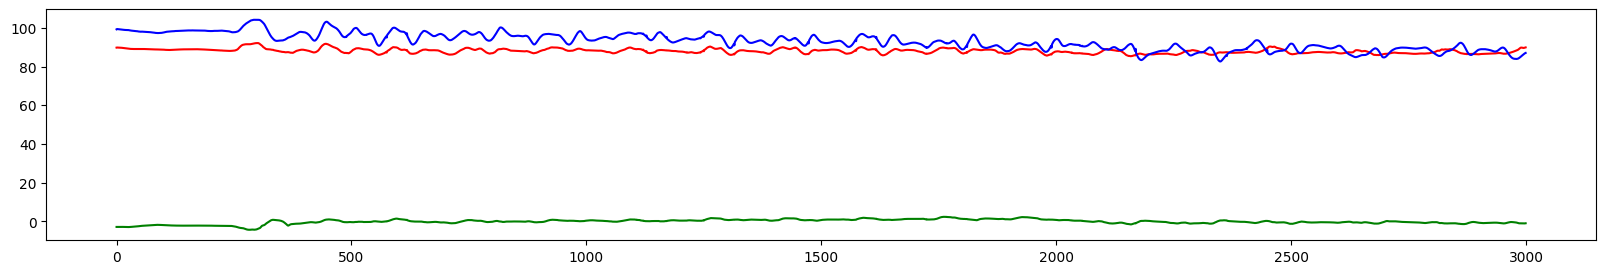

1


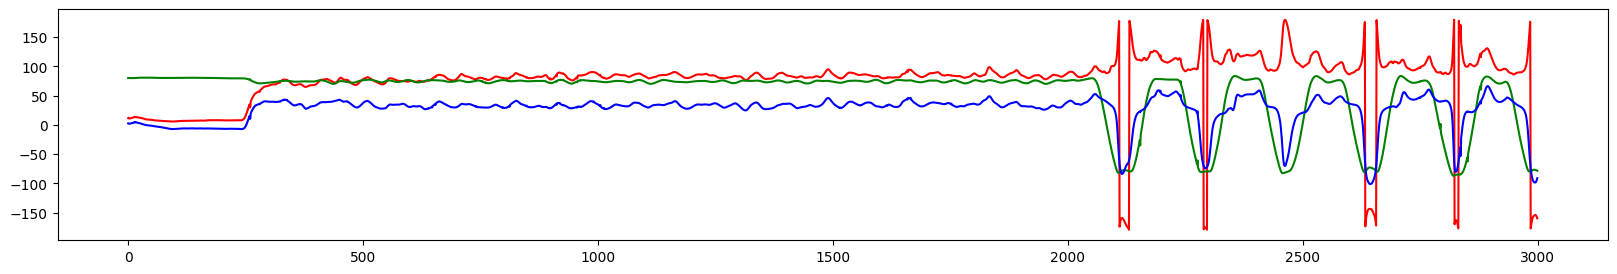

2


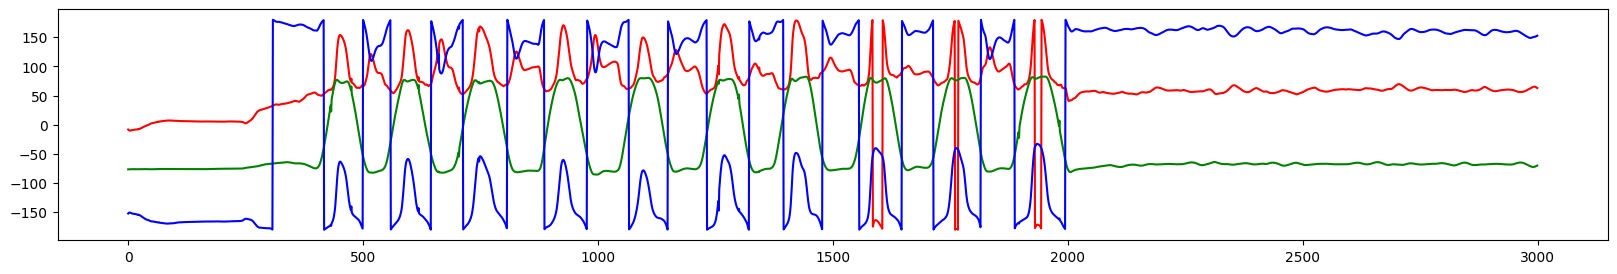

3


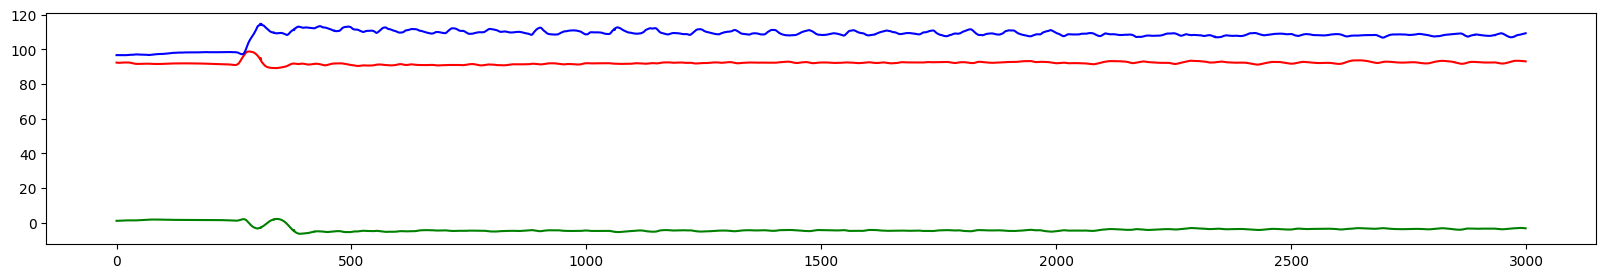

4


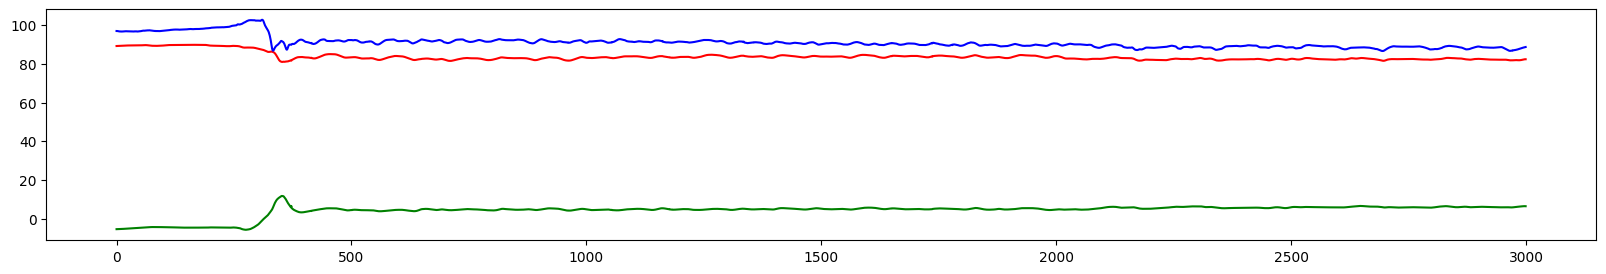

5


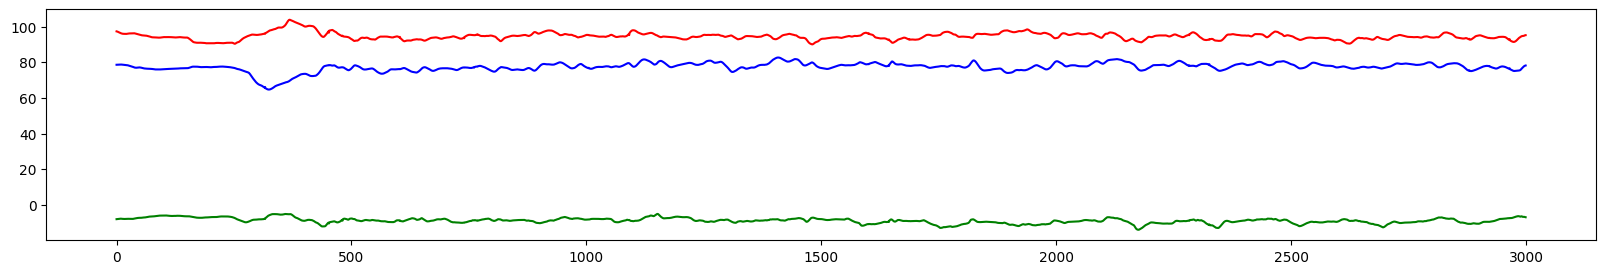

In [61]:
def sensor_show(data):
    euler = data['euler']
    acc = data['acc']
    show(euler)
    # show(acc)
    
for i, sensor in enumerate(sensors):
    print(i)
    sensor_show(sensor)

# Create Data

In [91]:
root_rot = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
], dtype=np.float32
)

X_0 = np.zeros(72, dtype=np.float32)
for i in range(6):
    st = i*9
    end = st + 9
    X_0[st:end] = root_rot.reshape(9)
X_0

data = []
for i in range(120):
    data.append(X_0.copy())
    
    
pi = np.pi
N = 360
for i in range(N):
    # euler_angles = np.radians([0, 0, i/4])  # Convert to radians if they are in degrees
    # euler_angles = np.radians([0, i/4, 0])
    euler_angles = np.radians([i/6, 0, 0])
    r = Rotation.from_euler('xyz', euler_angles)
    rotation_matrix = r.as_matrix()
    X_0[9:18] = rotation_matrix.dot(root_rot ).reshape(9)
    
    euler_angles = np.radians([0, i/6, 0])
    r = Rotation.from_euler('xyz', euler_angles)
    rotation_matrix = r.as_matrix()
    X_0[27:36] = rotation_matrix.dot(root_rot ).reshape(9)
    
    
    data.append(X_0.copy())
    
    
    
np.save(
    file='../output/data.npy',
    arr=np.array(data)
)

In [82]:
Rotation.from_euler("xyz", np.array([90, 0, 0]))

# Old

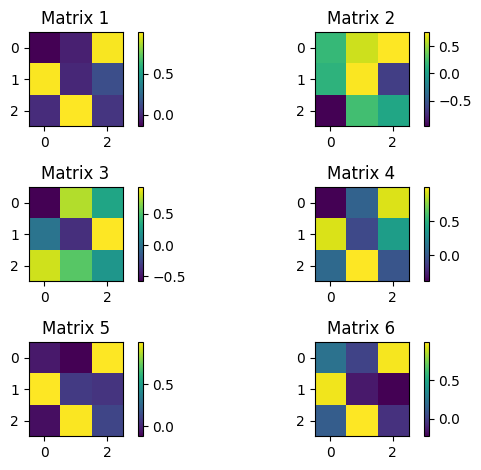

In [4]:
frame = imu[500]
rot = frame[:54].reshape((6, 3, 3))
acc = frame[54:].reshape((6, 3))

for i, matrix in enumerate(rot):
    plt.subplot(3, 2, i + 1)
    plt.imshow(matrix, cmap='viridis')
    plt.title(f"Matrix {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

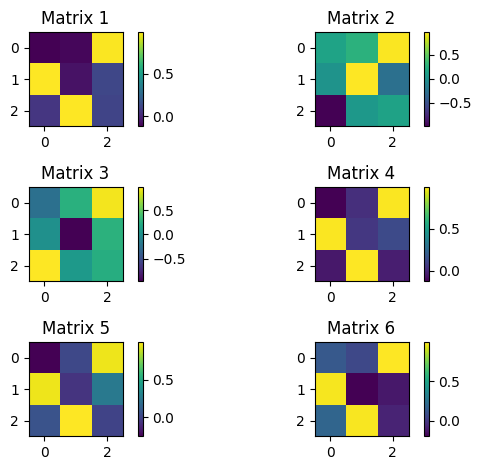

In [15]:
for i, matrix in enumerate(rot):
    plt.subplot(3, 2, i + 1)
    plt.imshow(matrix, cmap='viridis')
    plt.title(f"Matrix {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
a = np.array(range(54))
a.reshape((6, 3, 3))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[45, 46, 47],
        [48, 49, 50],
        [51, 52, 53]]])